<a href="https://colab.research.google.com/github/Digital-Image-Processing-IIITH/dip-project-firefly/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import random
# from collections import Counter
import plotly.express as px
import os
from os.path import isfile, join


def image_cluster(im,k):
  clustered_im = im  
  centroids = np.zeros([k,3]).astype(int)
  new_centroids = np.zeros([k,3])
  for i in range(k):
    centroids[i,:] = [random.randint(0,256),random.randint(0,256),random.randint(0,256)]
    new_centroids[i,:] = ['inf','inf','inf']
  
  cluster_color_id = np.zeros([k,3]).astype(int)
  cluster_color_id[:,0] = np.linspace(0, 255 , num=k)
  cluster_color_id[:,1] = np.linspace(255, 0 , num=k)
  cluster_color_id[0:int((k+1)/2),2] = cluster_color_id[int(k/2):k,0]
  cluster_color_id[int((k+1)/2):k,2] = cluster_color_id[0:int(k/2),0]
  
  n = 0
  dictionary = {}
  while error_l2_norm(centroids,new_centroids,k) >= 0.01 * k:
    centroids = new_centroids
    if n == 0:
      new_centroids = np.zeros([k,3])
      n += 1
    dist = np.zeros([k])
    
    points_in_centroid = np.zeros([k])
    for i in range(im.shape[0]):
      for j in range(im.shape[1]):
        for m in range(k):
          dist[m] = np.linalg.norm(im[i][j]-centroids[m,:], ord=None)
        min_dist = np.argmin(dist)
        dictionary[(i,j)] = min_dist
        points_in_centroid[min_dist] +=1
        new_centroids[min_dist,:] = (new_centroids[min_dist,:] * (points_in_centroid[min_dist] - 1) + im[i][j]) / points_in_centroid[min_dist]
        # points_in_centroid = Counter(dictionary.values())
        # new_centroids[min_dist,:] = (new_centroids[min_dist,:] * (points_in_centroid[min_dist] - 1) + im[i][j]) / points_in_centroid[min_dist]

  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      a = dictionary[(i,j)]
      clustered_im[i][j] = cluster_color_id[a,:]

  return clustered_im
     
#function for total residual error between the old and new centriods
def error_l2_norm(x,y,k):
  error = 0
  for i in range(k):
    error += np.linalg.norm(x[i,:]-y[i,:], ord=None)
  return error

def run(pathin,pathout):
  files = [f for f in os.listdir(pathin) if isfile(join(pathin, f))]
  files.sort(key = lambda x: int(x[2:-5]))

  for i in range(len(files)):
    filename=pathin + files[i]
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.show()

    clustered_im = image_cluster(im,3)
    plt.imshow(clustered_im)
    plt.show()
    output_filename = pathout + 'clustered_im' + "% s" % (i+1) + '.png'
    cv2.imwrite(output_filename,cv2.cvtColor(clustered_im, cv2.COLOR_BGR2RGB))

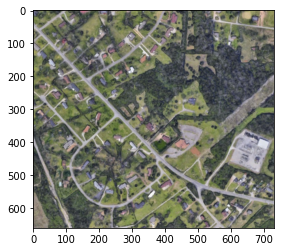

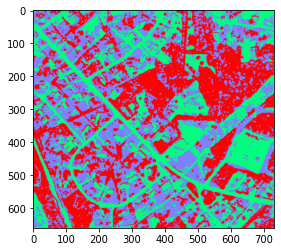

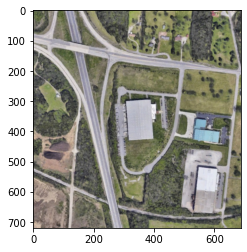

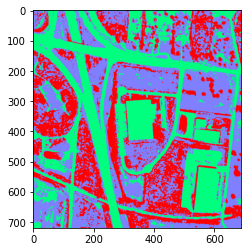

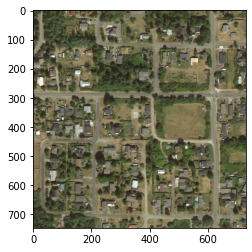

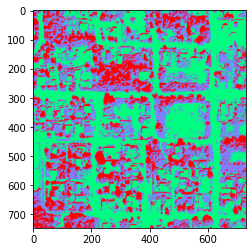

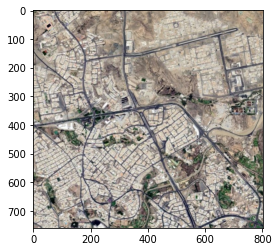

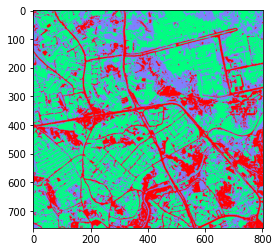

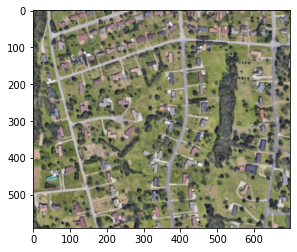

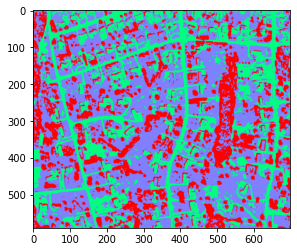

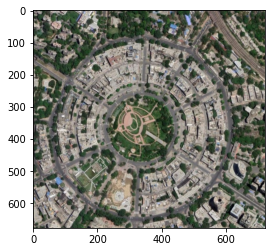

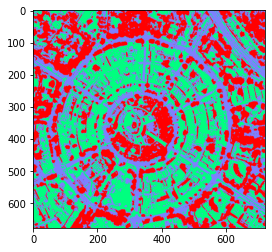

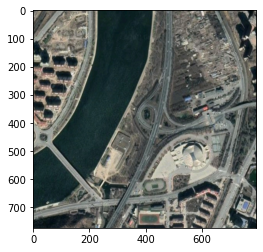

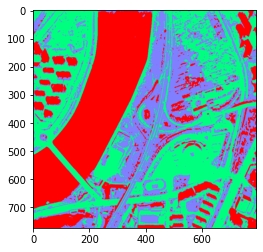

In [3]:
run('/content/drive/MyDrive/DIP project/input images/', '/content/drive/MyDrive/DIP project/Segmented maps/')

In [ ]:
map = cv2.imread("/content/drive/MyDrive/DIP project/map.JPG")
map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.imshow(map)
plt.show()

clustered_image = image_cluster(map,3)
plt.imshow(clustered_image)
plt.show()
cv2.imwrite('/content/drive/MyDrive/DIP project/Segmented maps/clustered_image1.png',cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))

In [ ]:
map2 = cv2.imread("/content/drive/MyDrive/DIP project/map2.jpeg")
map2 = cv2.cvtColor(map2, cv2.COLOR_BGR2RGB)
plt.imshow(map2)
plt.show()

clustered_image2 = image_cluster(map2,3)
plt.imshow(clustered_image2)
plt.show()
cv2.imwrite('/content/drive/MyDrive/DIP project/Segmented maps/clustered_image2.png',cv2.cvtColor(clustered_image2, cv2.COLOR_BGR2RGB))


In [ ]:
map3 = cv2.imread("/content/drive/MyDrive/DIP project/map3.JPG")
map3 = cv2.cvtColor(map3, cv2.COLOR_BGR2RGB)
plt.imshow(map3)
plt.show()

clustered_image3 = image_cluster(map3,3)
plt.imshow(clustered_image3)
plt.show()
cv2.imwrite('/content/drive/MyDrive/DIP project/Segmented maps/clustered_image3.png',cv2.cvtColor(clustered_image3, cv2.COLOR_BGR2RGB))

In [ ]:
map4 = cv2.imread("/content/drive/MyDrive/DIP project/map4.JPG")
map4 = cv2.cvtColor(map4, cv2.COLOR_BGR2RGB)
plt.imshow(map4)
plt.show()

clustered_image4 = image_cluster(map4,4)
plt.imshow(clustered_image4)
plt.show()
cv2.imwrite('/content/drive/MyDrive/DIP project/Segmented maps/clustered_image4.png',cv2.cvtColor(clustered_image4, cv2.COLOR_BGR2RGB))
px.imshow(clustered_image4).show()